In [1]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_rows=10

In [2]:
df=pd.read_csv("covid-data.csv")

In [21]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121029,ZWE,Africa,Zimbabwe,2021-09-29,130485.0,213.0,240.143,4616.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121030,ZWE,Africa,Zimbabwe,2021-09-30,130820.0,335.0,240.857,4623.0,7.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121031,ZWE,Africa,Zimbabwe,2021-10-01,131028.0,208.0,270.571,4624.0,1.0,3.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121032,ZWE,Africa,Zimbabwe,2021-10-02,131094.0,66.0,227.000,4625.0,1.0,3.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
121033,ZWE,Africa,Zimbabwe,2021-10-03,131129.0,35.0,214.857,4627.0,2.0,3.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [94]:
#replace NaN values with 0 so we can do math with them
df = df.dropna(subset=['date'])
df['total_deaths'] = df['total_deaths'].fillna(0)
df['handwashing_facilities'] = df['handwashing_facilities'].fillna(0)
df['population_density'] = df['population_density'].fillna(0)
df['total_tests_per_thousand'] = df['total_tests_per_thousand'].fillna(0)
df['population'] = df['population'].fillna(0)
df['hosp_patients_per_million']=df['hosp_patients_per_million'].fillna(0)
df['total_tests'] = df['total_tests'].fillna(0)
df['total_vaccinations_per_hundred']=df['total_vaccinations_per_hundred'].fillna(0)
df['total_boosters_per_hundred'] = df['total_boosters_per_hundred'].fillna(0)
df['people_vaccinated_per_hundred']=df['people_vaccinated_per_hundred'].fillna(0)
df['total_tests'] = df['total_tests'].fillna(0)
df['total_cases']=df['total_cases'].fillna(0)
df['total_boosters'] = df['total_boosters'].fillna(0)
df['total_vaccinations']=df['total_vaccinations'].fillna(0)
df['positive_rate'] = df['positive_rate'].fillna(0)
df['people_vaccinated']=df['people_vaccinated'].fillna(0)
df['hosp_patients']=df['hosp_patients'].fillna(0)

In [95]:
#calculate percentages
df['total_cases_percentage']=(df['total_cases'].div(df.population))*100
df['people_vaccinated_percentage']=(df['people_vaccinated'].div(df.population))*100
df['total_tests_percentage']=(df['total_tests'].div(df.population))*100
df['positive_rate_percentage']=(df['positive_rate'].div(df.population))*100
df['hosp_patients_percentage']=(df['hosp_patients'].div(df.population))*100

In [32]:
#drop rows that do not have a location
df = df[df['location'].notna()]

In [112]:
#calculating averages for variables
totalCasesMean=df.groupby('location')['total_cases_percentage'].agg(['mean'])
totalCasesMean.rename(columns={'mean': 'Total Cases'}, inplace=True)
peopleVaccinatedMean=df.groupby('location')['people_vaccinated_percentage'].agg(['mean'])
peopleVaccinatedMean.rename(columns={'mean': 'People Vaccinated'}, inplace=True)
totalTestsMean=df.groupby('location')['total_tests_percentage'].agg(['mean'])
totalTestsMean.rename(columns={'mean': 'Tests'}, inplace=True)
positiveRateMean=df.groupby('location')['positive_rate_percentage'].agg(['mean'])
positiveRateMean.rename(columns={'mean': 'Positive Rate'}, inplace=True)
hospPatientsMean=df.groupby('location')['hosp_patients_percentage'].agg(['mean'])
hospPatientsMean.rename(columns={'mean': 'Hospital Patients'}, inplace=True)
populationDensityMean=df.groupby('location')['population_density'].agg(['mean'])
populationDensityMean.rename(columns={'mean': 'Population Density'}, inplace=True)
#combine the variables
CasesVaccinations=totalCasesMean.merge(peopleVaccinatedMean, on="location")
CaseVaxTests=CasesVaccinations.merge(totalTestsMean, on="location")
CaseVaxTestPos=CaseVaxTests.merge(positiveRateMean, on="location")
CaseVaxTestPosHosp=CaseVaxTestPos.merge(hospPatientsMean, on="location")
AvgsTable=CaseVaxTestPosHosp.merge(populationDensityMean, on="location")
AvgsTable

,Total Cases,People Vaccinated,Tests,Positive Rate,Hospital Patients,Population Density
location,,,,,,
Afghanistan,0.145446,0.046394,0.000000,0.000000e+00,0.0,54.422
Africa,0.211353,0.923984,0.000000,0.000000e+00,0.0,0.000
Albania,2.234488,4.332031,6.028648,4.579129e-06,0.0,104.871
Algeria,0.187565,0.077619,0.000000,0.000000e+00,0.0,17.348
Andorra,9.403079,1.401670,16.317843,4.377132e-05,0.0,163.755
...,...,...,...,...,...,...
Wallis and Futuna,0.000000,5.391297,0.000000,0.000000e+00,0.0,0.000
World,1.058085,7.081909,0.000000,0.000000e+00,0.0,58.045
Yemen,0.011554,0.015123,0.000000,0.000000e+00,0.0,53.508


In [113]:
#create correlation
Corr=AvgsTable.corr()

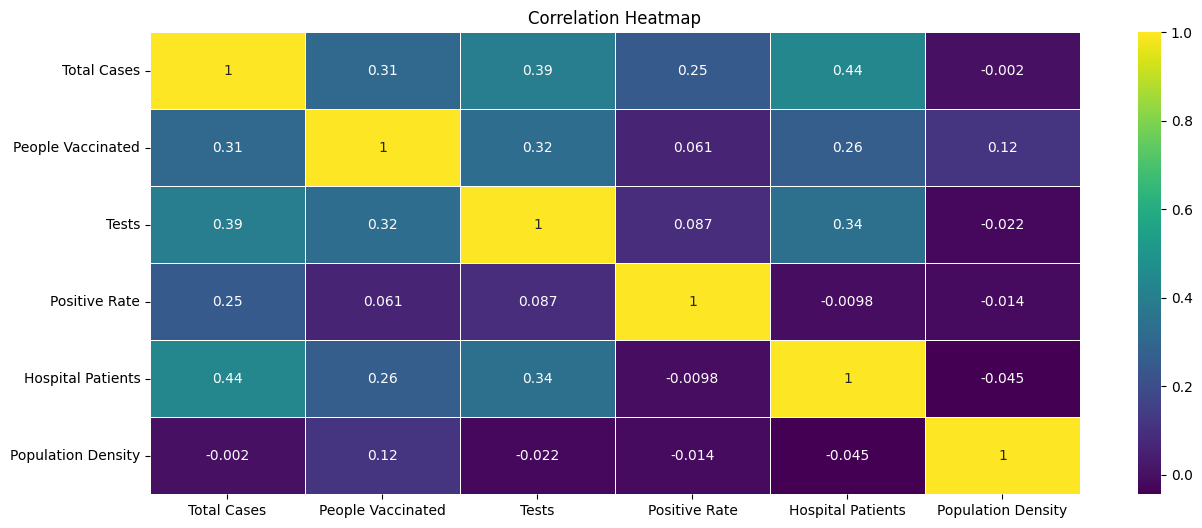

In [114]:
#create a heatmap of the correlation
plt.figure(figsize=(15,6))
sns.heatmap(Corr, annot=True, linewidth=0.5, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Cases vs. Vaccinations')

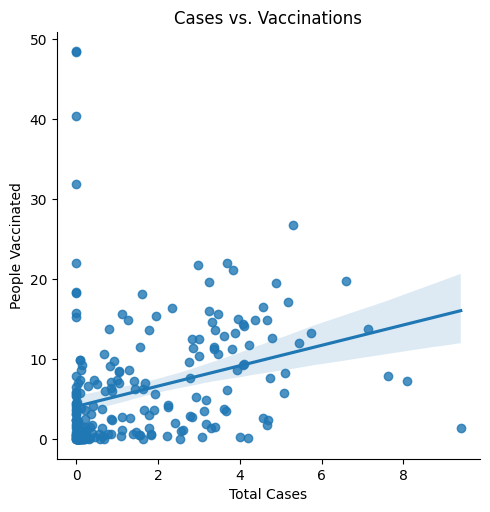

In [129]:
sns.lmplot(data=AvgsTable, x="Total Cases", y="People Vaccinated")
plt.title("Cases vs. Vaccinations")

Text(0.5, 1.0, 'Cases vs. Tests')

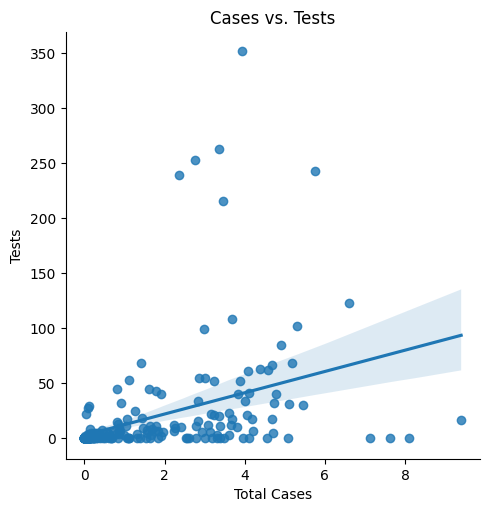

In [130]:
sns.lmplot(data=AvgsTable, x="Total Cases", y="Tests")
plt.title("Cases vs. Tests")

Text(0.5, 1.0, 'Cases vs. Positive Rate')

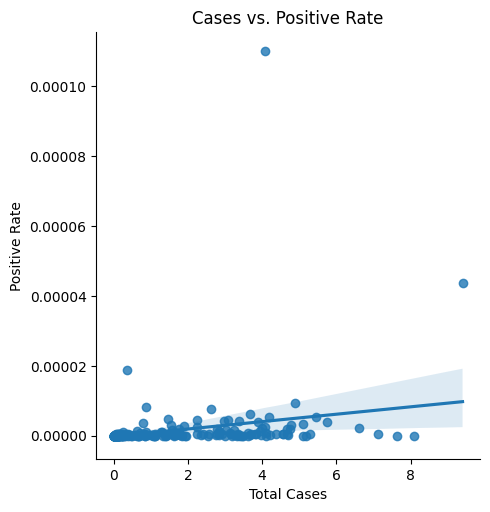

In [131]:
sns.lmplot(data=AvgsTable, x="Total Cases", y="Positive Rate")
plt.title("Cases vs. Positive Rate")

Text(0.5, 1.0, 'Tests vs. Positive Rate')

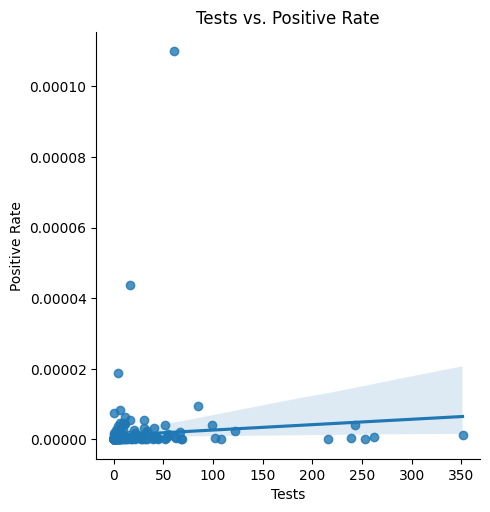

In [132]:
sns.lmplot(data=AvgsTable, x="Tests", y="Positive Rate")
plt.title("Tests vs. Positive Rate")

Text(0.5, 1.0, 'Cases vs. Hospitalizations')

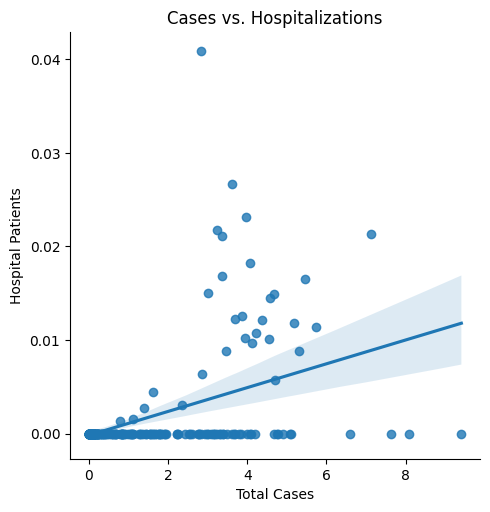

In [133]:
sns.lmplot(data=AvgsTable, x="Total Cases", y="Hospital Patients")
plt.title("Cases vs. Hospitalizations")

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\numpy\lib\nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(0.5, 1.0, 'Cases vs. Population Density')

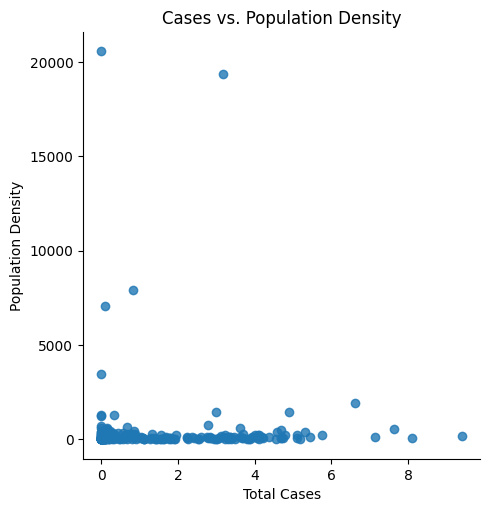

In [134]:
sns.lmplot(data=AvgsTable, x="Total Cases", y="Population Density")
plt.title("Cases vs. Population Density")

In [115]:
#finding the countries that did worst and best over the 2-year period

In [47]:
#change date column to string
df['date'] = df['date'].astype(str)

In [35]:
sorted=df.groupby('location')['total_cases_percentage'].agg(['mean'])

In [42]:
#drop rows with no data
sorted = sorted[sorted['mean'] > 0] 

In [43]:
highestcasespercent=sorted.nlargest(n=6, columns=['mean'])
highestcasespercent

,mean
location,
International,inf
Andorra,9.403079
Montenegro,8.090534
San Marino,7.632207
Czechia,7.132106
Bahrain,6.605629


In [44]:
lowestcasespercent=sorted.nsmallest(n=5, columns=['mean'])
lowestcasespercent

,mean
location,
Micronesia (country),0.000860
Vanuatu,0.000886
Tanzania,0.001137
Samoa,0.001346
Kiribati,0.001630


In [136]:
#create a dataframe with the top 5 and bottom 5 countries sorted by percentage of cases
#I dropped "International" as a location
Andorra=(df[df['location'] == 'Andorra'])
Montenegro=(df[df['location'] == 'Montenegro'])
SanMarino=(df[df['location'] == 'San Marino'])
Czechia=(df[df['location'] == 'Czechia'])
Bahrain=(df[df['location'] == 'Bahrain'])
Micronesia=(df[df['location'] == 'Micronesia (country)'])
Vanuatu=(df[df['location'] == 'Vanuatu'])
Tanzania=(df[df['location'] == 'Tanzania'])
Samoa=(df[df['location'] == 'Samoa'])
Kiribati=(df[df['location'] == 'Kiribati'])

In [137]:
cleaned=pd.concat([Andorra, Montenegro, SanMarino, Czechia, Bahrain,
                  Micronesia, Vanuatu, Tanzania, Samoa, Kiribati], axis=0)
cleaned

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,total_cases_percentage,people_vaccinated_percentage,total_tests_percentage,positive_rate_percentage,hosp_patients_percentage
2361,AND,Europe,Andorra,2020-03-02,1.0,1.0,NaN,0.0,NaN,NaN,...,0.868,NaN,NaN,NaN,NaN,0.001293,0.0,0.0,0.0,0.0
2362,AND,Europe,Andorra,2020-03-03,1.0,0.0,NaN,0.0,NaN,NaN,...,0.868,NaN,NaN,NaN,NaN,0.001293,0.0,0.0,0.0,0.0
2363,AND,Europe,Andorra,2020-03-04,1.0,0.0,NaN,0.0,NaN,NaN,...,0.868,NaN,NaN,NaN,NaN,0.001293,0.0,0.0,0.0,0.0
2364,AND,Europe,Andorra,2020-03-05,1.0,0.0,NaN,0.0,NaN,NaN,...,0.868,NaN,NaN,NaN,NaN,0.001293,0.0,0.0,0.0,0.0
2365,AND,Europe,Andorra,2020-03-06,1.0,0.0,NaN,0.0,NaN,NaN,...,0.868,NaN,NaN,NaN,NaN,0.001293,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58321,KIR,Oceania,Kiribati,2021-09-29,2.0,0.0,0.0,0.0,NaN,0.0,...,0.630,NaN,NaN,NaN,NaN,0.001648,0.0,0.0,0.0,0.0
58322,KIR,Oceania,Kiribati,2021-09-30,2.0,0.0,0.0,0.0,NaN,0.0,...,0.630,NaN,NaN,NaN,NaN,0.001648,0.0,0.0,0.0,0.0
58323,KIR,Oceania,Kiribati,2021-10-01,2.0,0.0,0.0,0.0,NaN,0.0,...,0.630,NaN,NaN,NaN,NaN,0.001648,0.0,0.0,0.0,0.0
58324,KIR,Oceania,Kiribati,2021-10-02,2.0,0.0,0.0,0.0,NaN,0.0,...,0.630,NaN,NaN,NaN,NaN,0.001648,0.0,0.0,0.0,0.0


In [186]:
#creating a dataframe for each year
Y2020=(df[df['date'].str.contains('2020-')])
Y2020["date"] = pd.to_datetime(Y2020["date"])
Y2021=(df[df['date'].str.contains('2021-')])
Y2021["date"] = pd.to_datetime(Y2021["date"])
cleaned2020=(cleaned[cleaned['date'].str.contains('2020-')])
cleaned2020["date"] = pd.to_datetime(Y2020["date"])
cleaned2021=(cleaned[cleaned['date'].str.contains('2021-')])
cleaned2021["date"] = pd.to_datetime(Y2021["date"])

C:\Users\augus\AppData\Local\Temp\ipykernel_18208\1154786745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y2020["date"] = pd.to_datetime(Y2020["date"])
C:\Users\augus\AppData\Local\Temp\ipykernel_18208\1154786745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y2021["date"] = pd.to_datetime(Y2021["date"])
C:\Users\augus\AppData\Local\Temp\ipykernel_18208\1154786745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [188]:
sorted2020=Y2020.groupby('location')['total_cases_percentage'].agg(['mean'])
#drop rows with no data
sorted2020 = sorted2020[sorted2020['mean'] > 0] 
sorted2021=Y2021.groupby('location')['total_cases_percentage'].agg(['mean'])
#drop rows with no data
sorted2021 = sorted2021[sorted2021['mean'] > 0] 

In [189]:
#merge sorted2021 and sorted2020 dataframes so that we can find the most improvement
sorted2020.rename(columns={'mean': '2020 Mean'}, inplace=True)
sorted2021.rename(columns={'mean': '2021 Mean'}, inplace=True)
improvementdf=sorted2021.merge(sorted2020, on="location")
improvementdf

,2021 Mean,2020 Mean
location,,
Afghanistan,0.232536,0.068404
Africa,0.381338,0.066103
Albania,4.282237,0.417193
Algeria,0.312971,0.076272
Andorra,16.595888,2.894176
...,...,...
Vietnam,0.123558,0.000650
World,2.029155,0.281230
Yemen,0.018146,0.004714


In [190]:
improvementdf['Change']=improvementdf['2021 Mean'] - improvementdf['2020 Mean'] 
improvementdf

,2021 Mean,2020 Mean,Change
location,,,
Afghanistan,0.232536,0.068404,0.164131
Africa,0.381338,0.066103,0.315235
Albania,4.282237,0.417193,3.865044
Algeria,0.312971,0.076272,0.236699
Andorra,16.595888,2.894176,13.701712
...,...,...,...
Vietnam,0.123558,0.000650,0.122908
World,2.029155,0.281230,1.747925
Yemen,0.018146,0.004714,0.013432


In [191]:
#to find the countries that improved the most, we find the countries with the least growth in cases
#from 2020 to 2021
MostImproved5=improvementdf.nsmallest(n=5, columns=['Change'])
MostImproved5

,2021 Mean,2020 Mean,Change
location,,,
Samoa,0.001417,0.000897,0.000520
Vanuatu,0.000993,0.000318,0.000675
China,0.006340,0.005508,0.000831
Solomon Islands,0.002720,0.001880,0.000841
Tanzania,0.001574,0.000722,0.000852


In [192]:
LeastImproved5=improvementdf.nlargest(n=5, columns=['Change'])
LeastImproved5

,2021 Mean,2020 Mean,Change
location,,,
Andorra,16.595888,2.894176,13.701712
Montenegro,14.843252,1.663809,13.179443
Czechia,13.836906,1.219887,12.617019
San Marino,13.485068,2.370351,11.114717
Seychelles,10.375202,0.096355,10.278847


In [193]:
#create a dataframe with the top 5 and bottom 5 countries sorted by percentage of cases
#I dropped "International" as a location
Samoa=(df[df['location'] == 'Samoa'])
Vanuatu=(df[df['location'] == 'Vanuatu'])
China=(df[df['location'] == 'China'])
SolomonIslands=(df[df['location'] == 'Solomon Islands'])
Tanzania=(df[df['location'] == 'Tanzania'])
Andorra=(df[df['location'] == 'Andorra'])
Montenegro=(df[df['location'] == 'Montenegro'])
Czechia=(df[df['location'] == 'Czechia'])
SanMarino=(df[df['location'] == 'San Marino'])
Seychelles=(df[df['location'] == 'Seychelles'])

In [194]:
cleaned=pd.concat([Samoa, Vanuatu, China, SolomonIslands, Tanzania,
                  Andorra, Montenegro, Czechia, SanMarino, Seychelles], axis=0)
cleaned

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,total_cases_percentage,people_vaccinated_percentage,total_tests_percentage,positive_rate_percentage,hosp_patients_percentage
92828,WSM,Oceania,Samoa,2020-11-18,1.0,1.0,NaN,0.0,NaN,NaN,...,0.715,NaN,NaN,NaN,NaN,0.000500,0.0,0.0,0.0,0.0
92829,WSM,Oceania,Samoa,2020-11-19,1.0,0.0,NaN,0.0,NaN,NaN,...,0.715,NaN,NaN,NaN,NaN,0.000500,0.0,0.0,0.0,0.0
92830,WSM,Oceania,Samoa,2020-11-20,1.0,0.0,NaN,0.0,NaN,NaN,...,0.715,NaN,NaN,NaN,NaN,0.000500,0.0,0.0,0.0,0.0
92831,WSM,Oceania,Samoa,2020-11-21,1.0,0.0,NaN,0.0,NaN,NaN,...,0.715,NaN,NaN,NaN,NaN,0.000500,0.0,0.0,0.0,0.0
92832,WSM,Oceania,Samoa,2020-11-22,1.0,0.0,NaN,0.0,NaN,NaN,...,0.715,NaN,NaN,NaN,NaN,0.000500,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96591,SYC,Africa,Seychelles,2021-09-29,21473.0,99.0,41.857,112.0,2.0,0.286,...,0.796,NaN,NaN,NaN,NaN,21.709635,0.0,0.0,0.0,0.0
96592,SYC,Africa,Seychelles,2021-09-30,21473.0,0.0,41.857,112.0,0.0,0.286,...,0.796,NaN,NaN,NaN,NaN,21.709635,0.0,0.0,0.0,0.0
96593,SYC,Africa,Seychelles,2021-10-01,21507.0,34.0,32.286,112.0,0.0,0.286,...,0.796,NaN,NaN,NaN,NaN,21.744010,0.0,0.0,0.0,0.0
96594,SYC,Africa,Seychelles,2021-10-02,21507.0,0.0,32.286,112.0,0.0,0.286,...,0.796,NaN,NaN,NaN,NaN,21.744010,0.0,0.0,0.0,0.0


C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '2020')

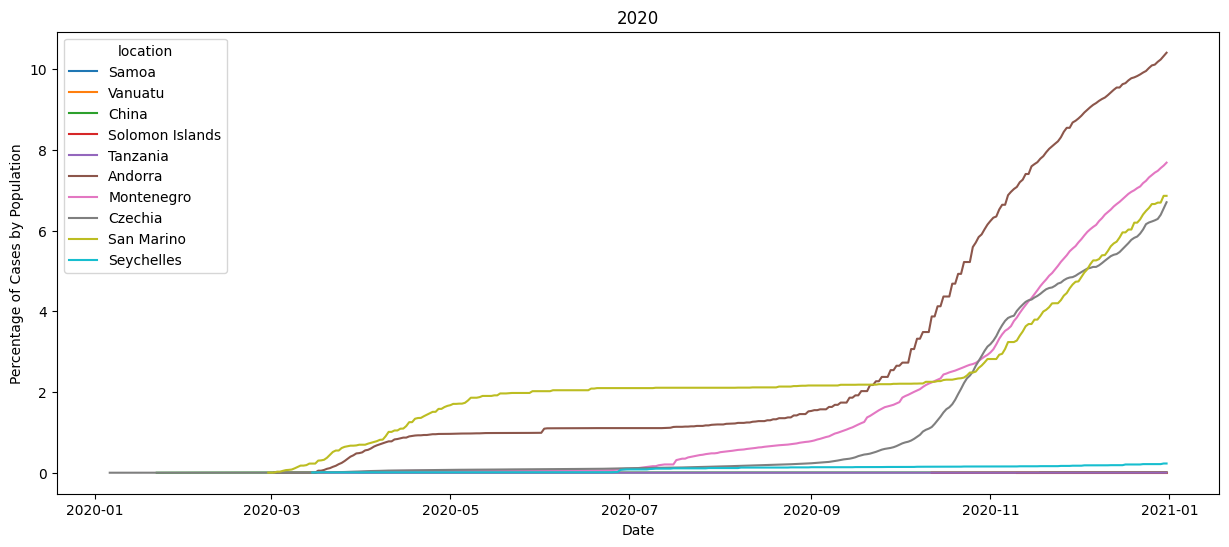

In [195]:
plt.figure(figsize=(15,6))
sns.lineplot(data=cleaned2020, x="date", y="total_cases_percentage", hue="location")
plt.xlabel("Date")
plt.ylabel("Percentage of Cases by Population")
plt.title("2020")

C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\augus\OneDrive\Documents\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '2021')

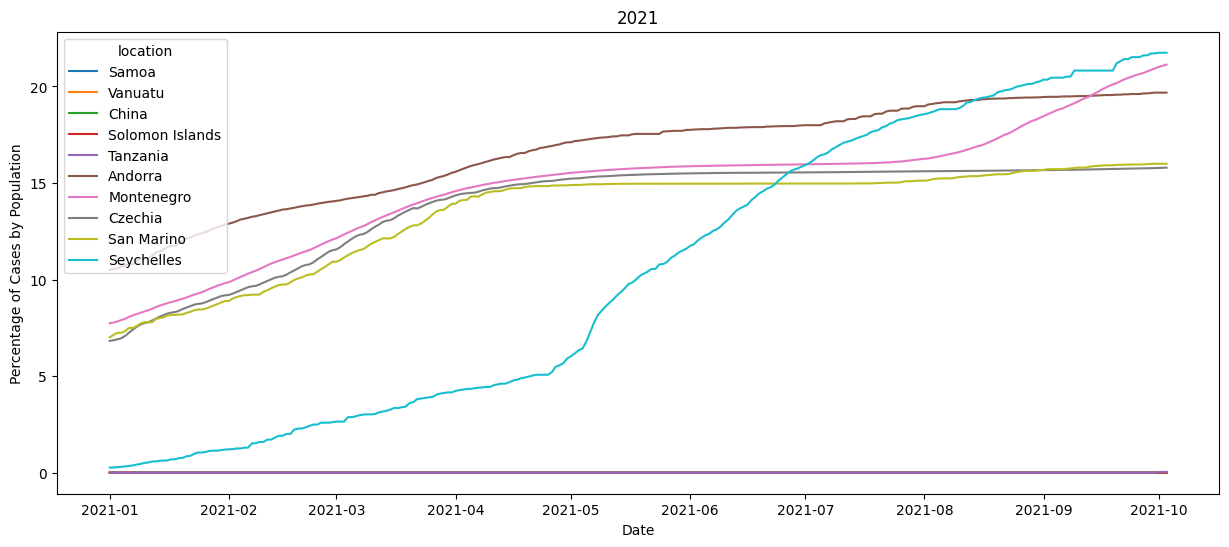

In [196]:
plt.figure(figsize=(15,6))
sns.lineplot(data=cleaned2021, x="date", y="total_cases_percentage", hue="location")
plt.xlabel("Date")
plt.ylabel("Percentage of Cases by Population")
plt.title("2021")